<a href="https://colab.research.google.com/github/NickNome1012/FitConnect.github.io/blob/main/Notebook_AvaliacaoModelos_FeatureEngineering_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarefa 2 - Feature Engineering e Avaliação de Modelos**

O objetivo deste trabalho é verificar o impacto da aplicação de técnicas de feature engineering e avaliação de modelos na execução de algoritmo de Machine Learning especificamente no KNN

####**Dicas:**

- Tutorial para iniciantes em Python: https://www.datacamp.com/cheat-sheet/getting-started-with-python-cheat-sheet

- Documentação do pandas: https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX

- Documentação do scikit-learn: https://scikit-learn.org/stable/

- Documentação do matplotlib: https://matplotlib.org/stable/index.html

- Documentação do seaborn: https://seaborn.pydata.org/tutorial.html

---

### **Dataset:**

  Este conjunto de dados inclui informações para a estimativa dos níveis de obesidade em indivíduos dos países México, Peru e Colômbia, com base em seus hábitos alimentares e condição física. Os dados contêm 18 atributos e 2111 registros, que estão rotulados com a variável de classe **NObesity** (Nível de Obesidade), permitindo a classificação dos dados usando os valores **Normal Weight** e **Obesity**.
  
**Colunas:**

1. **Gender**

2. **Age**
3. **Height**
4. **Weight**
5. **family_history_with_overweight** → Algum membro da família já sofreu ou sofre de excesso de peso?
6. **FAVC** → Você come alimentos altamente calóricos com frequência?
7. **FCVC** → Você costuma comer vegetais nas suas refeições?
8. **NCP** → Quantas refeições principais você faz diariamente?
9. **CAEC** → Você come algo entre as refeições?
10. **SMOKE** → Você fuma?
11. **CH2O** → Quanto de água você bebe diariamente?
12. **SCC** → Você monitora as calorias que consome diariamente?
13. **FAF** → Com que frequência você pratica atividade física?
14. **TUE** → Quanto tempo você utiliza dispositivos tecnológicos como celular, videogames, televisão, computador e outros?
15. **CALC** → Com que frequência você consome álcool?
16. **MTRANS** → Qual meio de transporte você costuma usar?
17. **TW1** → Quantas calorias você consumiu na última refeição?
18. **NObeyesdad** → Nível de obesidade (alvo)



## **Importe os Pacotes**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

## **Crie os datasets**
### **Crie um DataFrame a partir do arquivo de dados disponibilizados no EaD**

In [ ]:
df_original = pd.read_csv('dataset_obesity-2024_2.csv')
df_original.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,TW1
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal Weight,42.0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal Weight,42.0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal Weight,46.0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Normal Weight,54.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Normal Weight,44.0


## **Feature Engineering**
Crie uma cópia do DataFrame original para realizar o feature engineering para depois comparar o impacto
Olhando para o dataset, que features poderiam ser criadas que seriam úteis para nossa tarefa de predição?

**Dica que quase não é dica**: IMC deve ser interessante.... Crie uma coluna IMC e discretize os seus dados em grupos e veja se há alguma relação com a variável de nível de obesidade (alvo)

In [ ]:
df = df_original.copy()
# Apresenta valores faltantes em Height
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['IMC'] = df['Weight']/(df['Height'] ** 2)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,TW1,IMC
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal Weight,42.0,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal Weight,42.0,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal Weight,46.0,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Normal Weight,54.0,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Normal Weight,44.0,28.342381


In [ ]:
df["IMC"] = pd.cut(df["IMC"], bins = 5, labels = [1,2,3,4,5])
df[["NObeyesdad","IMC"]]

,NObeyesdad,IMC
0,Normal Weight,2
1,Normal Weight,2
2,Normal Weight,2
3,Normal Weight,2
4,Normal Weight,2
...,...,...
2106,Obesity,4
2107,Obesity,4
2108,Obesity,4
2109,Obesity,4


## **Pré-Processe os dados novamente**
**Dica 1:**
- Aproveite o que foi feito no trabalho anterior (remoção de outliers, transformação de valores e etc), lembrando que agora será necessario pré-processar as colunas novas criadas

**Dica 2:**
- Se estiver tendo problema com o OneHotEncoder criando valores NaN, resete o index do dataframe df original e do dataframe criado para o onehot para alinhar os dados

**Dica 3:**
- Não normalizem os dados aqui, deixem pra normalizar após a divisão do dataset (etapa lá na frente)

In [ ]:
df.isnull().sum()
# Não apresenta mais nenhum dado faltante, todos estavam em Height

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


<Axes: >

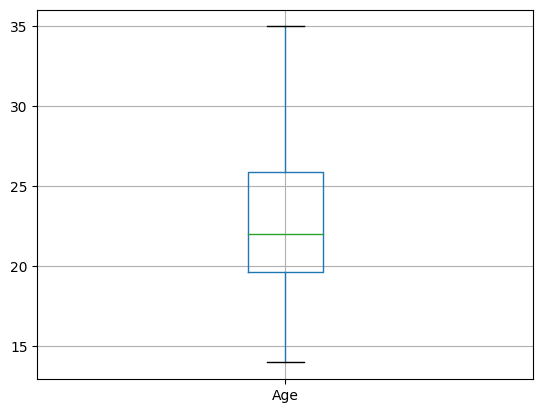

In [ ]:
# Removendo outliers da coluna Age
q1_age = df.Age.quantile(0.25)
q3_age = df.Age.quantile(0.75)
iqr_age = q3_age - q1_age

sup_age = q3_age + 1.5 * iqr_age
inf_age = q1_age - 1.5 * iqr_age

df = df[(df["Age"] >= inf_age) & (df["Age"] <= sup_age)]
df.boxplot(column=["Age"])

<Axes: >

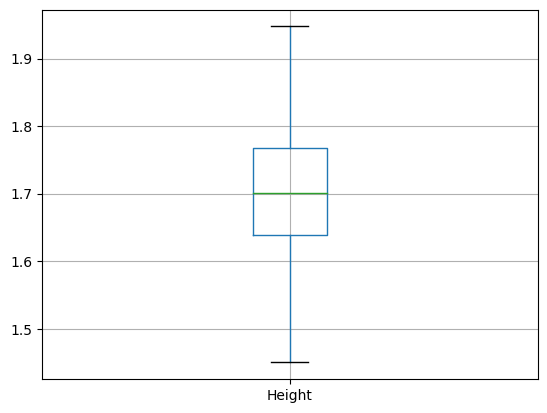

In [ ]:
# Removendo outliers da coluna Height
q1_height = df.Height.quantile(0.25)
q3_height = df.Height.quantile(0.75)
iqr_height = q3_height - q1_height

sup_height = q3_height + 1.5 * iqr_height
inf_height = q1_height - 1.5 * iqr_height

df = df[(df["Height"] >= inf_height) & (df["Height"] <= sup_height)]
df.boxplot(column=["Height"])

# Como visto na atividade anterior, a coluna Weight não apresenta outliers

In [ ]:
le_caec = LabelEncoder()
ordem_caec = { "no" : 0, "Sometimes" : 1, "Frequently" : 2 , "Always" : 3}
df["CAEC_ordenado"] = df["CAEC"].map(ordem_caec)
df["CAEC"] = le_caec.fit_transform(df["CAEC_ordenado"])
df.drop(columns=['CAEC_ordenado'], inplace=True)


le_calc = LabelEncoder()
ordem_calc = { "no" : 0, "Sometimes" : 1, "Frequently" : 2 , "Always" : 3}
df["CALC_ordenado"] = df["CALC"].map(ordem_calc)
df["CALC"] = le_calc .fit_transform(df["CALC_ordenado"])
df.drop(columns=['CALC_ordenado'], inplace=True)


le_nob = LabelEncoder()
ordem_nobesydad = { "Normal_Weight" : 0,  "Obesity" : 1 }
df["NObeyesdad_ordenado"] = df["NObeyesdad"].map(ordem_nobesydad)
df["NObeyesdad"] = le_nob.fit_transform(df["NObeyesdad_ordenado"])
df.drop(columns=['NObeyesdad_ordenado'], inplace=True)


le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])


le_family_history = LabelEncoder()
df["family_history_with_overweight"] = le_family_history.fit_transform(df["family_history_with_overweight"])


le_favc = LabelEncoder()
df["FAVC"] = le_favc.fit_transform(df["FAVC"])


le_smoke = LabelEncoder()
df["SMOKE"] = le_smoke.fit_transform(df["SMOKE"])


le_scc = LabelEncoder()
df["SCC"] = le_scc.fit_transform(df["SCC"])


df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,TW1,IMC
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,1,42.0,2
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,1,42.0,2
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,1,46.0,2
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,1,54.0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,1,44.0,2


In [ ]:
pd.set_option('display.max_columns', None)
print(df)

      Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
encoded_data = ohe.fit_transform(df[["MTRANS"]])
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(["MTRANS"]))
df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(columns=["MTRANS"])
df.head()
df.isna().sum()


,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


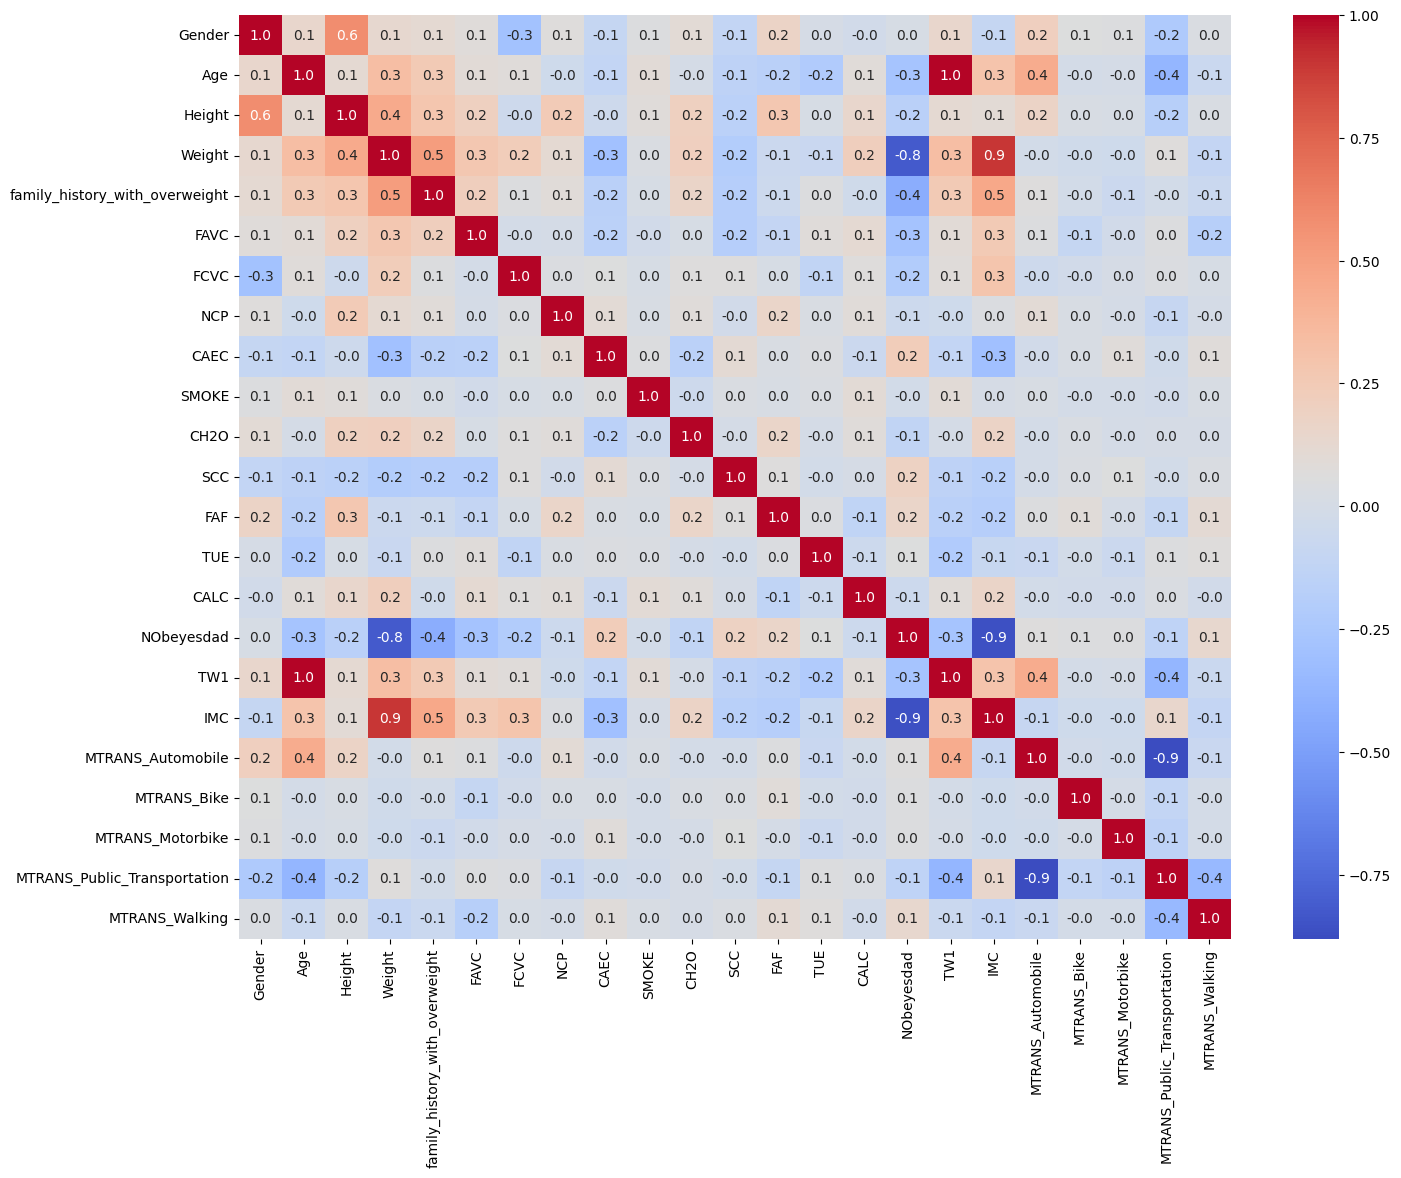

In [ ]:
# Grau de correlação
matriz_corr = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

In [ ]:
df.drop(columns=['TW1'], inplace = True)

# df.drop(columns = ['Weight'], inplace = True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,IMC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,2,0.0,0.0,0.0,1.0,0.0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,2,0.0,0.0,0.0,1.0,0.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,2,0.0,0.0,0.0,1.0,0.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2,0.0,0.0,0.0,0.0,1.0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,2,0.0,0.0,0.0,1.0,0.0


## **Criação de Conjuntos de Treinamento e Teste**

Divida os dados em conjuntos de treino, validação e teste. Para isso, selecione aleatoriamente e sem reposição 75% dos registros para o conjunto de treinamento. As observações restantes (25%) serão ditribidas igualmente para os conjuntos de validação e teste.

Dicas:
- Fixe a semente de geração de dados aleatórios (escolha um número), utilize o comando `np.random.seed(escolha um número)`, antes de executar qualquer célula de comando que possa variar de valor resultante toda vez que for executada.

- Para fazer a divisão de treino, validação, teste use a função `train_test_split()`

- Aqui é o local ideal para normalizar, normalize somente os conjuntos X ( X_train, X_test....)

In [ ]:
np.random.seed(4)
x = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']
x_treino, x_temp, y_treino, y_temp = train_test_split(x, y, test_size = 0.25)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5)

In [ ]:
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_treino)
x_test_norm = scaler.fit_transform(x_test)
x_val_norm = scaler.fit_transform(x_val)

## **Treine e Teste o Modelo de KNN**

Treinar cinco versões diferentes do modelo K-Nearest Neighbors (KNN) utilizando valores variados para o parâmetro K.

**Dica:**
- Busque pela função `KNeighborsClassifier(n_neighbors=?)` da biblioteca `scikitlearn`

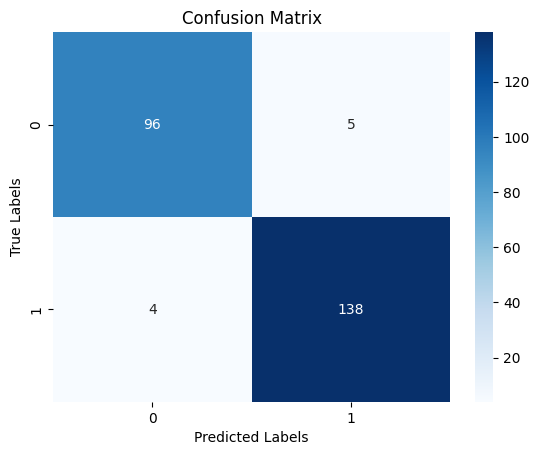

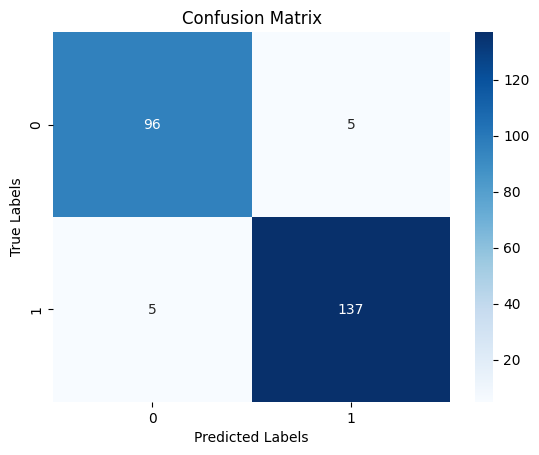

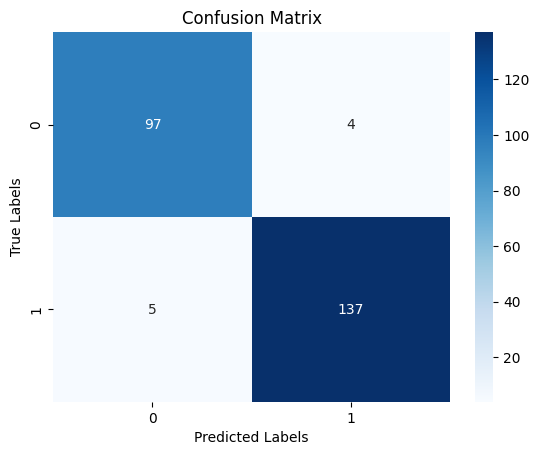

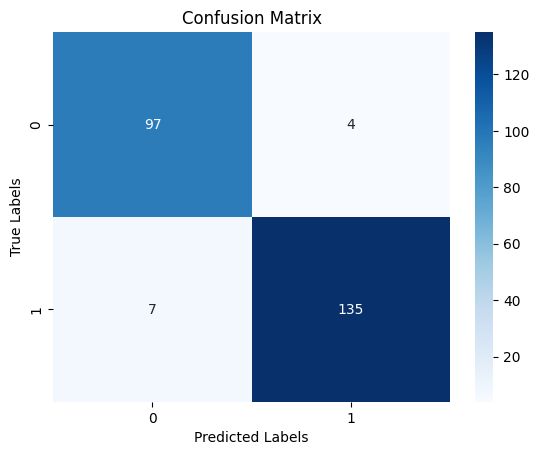

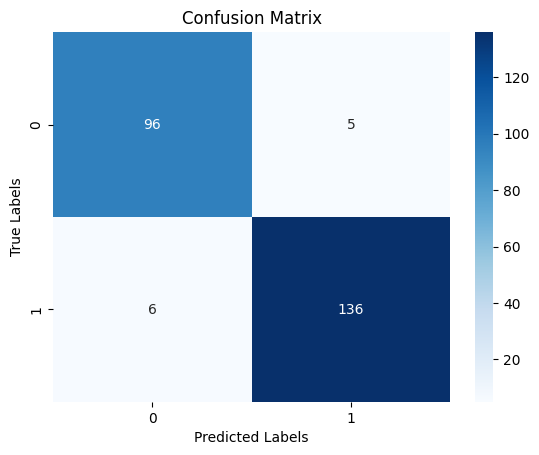

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(x_train_norm, y_treino)

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(x_train_norm, y_treino)

knn3 = KNeighborsClassifier(n_neighbors = 7)
knn3.fit(x_train_norm, y_treino)

knn4 = KNeighborsClassifier(n_neighbors = 9)
knn4.fit(x_train_norm, y_treino)

knn5 = KNeighborsClassifier(n_neighbors = 11)
knn5.fit(x_train_norm, y_treino)

y_pred1 = knn1.predict(x_val_norm)
y_pred2 = knn2.predict(x_val_norm)
y_pred3 = knn3.predict(x_val_norm)
y_pred4 = knn4.predict(x_val_norm)
y_pred5 = knn5.predict(x_val_norm)


conf_matrix1 = confusion_matrix(y_val, y_pred1)
conf_matrix2 = confusion_matrix(y_val, y_pred2)
conf_matrix3 = confusion_matrix(y_val, y_pred3)
conf_matrix4 = confusion_matrix(y_val, y_pred4)
conf_matrix5 = confusion_matrix(y_val, y_pred5)

sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### **Interprete e explique a Matriz de Confusão gerada**

Analisando todas as matrizes, podemos ver que os valores obtidos foram parecidos para todos os valores de k. Observamos também que houve mais verdadeiros negativos do que verdadeiros positivos, o que é refletido pelo maior número de dados gerais negativos do que positivos.

### **Calcule e mostre as métricas de precisão, cobertura (recall) e medida F1 para cada classe, além da acurácia, todas para o conjunto de validação.**

**Dica:**
- Para calcular as métricas do modelo busque pelas funções `accuracy_score()`, `recall_score()`, `precision_score()`, `f1_score()`

In [ ]:
accuracy_score1 = accuracy_score(y_val, y_pred1)
accuracy_score2 = accuracy_score(y_val, y_pred2)
accuracy_score3 = accuracy_score(y_val, y_pred3)
accuracy_score4 = accuracy_score(y_val, y_pred4)
accuracy_score5 = accuracy_score(y_val, y_pred5)

print(f"Acurácia do modelo 1: {accuracy_score1}")
print(f"Acurácia do modelo 2: {accuracy_score2}")
print(f"Acurácia do modelo 3: {accuracy_score3}")
print(f"Acurácia do modelo 4: {accuracy_score4}")
print(f"Acurácia do modelo 5: {accuracy_score5}")

recall1 = recall_score(y_val, y_pred1)
recall2 = recall_score(y_val, y_pred2)
recall3 = recall_score(y_val, y_pred3)
recall4 = recall_score(y_val, y_pred4)
recall5 = recall_score(y_val, y_pred5)

print("Recall:\n")
print(recall1)
print(recall2)
print(recall3)
print(recall4)
print(recall5)

Acurácia do modelo 1: 0.9629629629629629
Acurácia do modelo 2: 0.9588477366255144
Acurácia do modelo 3: 0.9629629629629629
Acurácia do modelo 4: 0.9547325102880658
Acurácia do modelo 5: 0.9547325102880658
Recall:

0.971830985915493
0.9647887323943662
0.9647887323943662
0.9507042253521126
0.9577464788732394


In [ ]:
print("Precisão:\n")

precision_score1 = precision_score(y_val, y_pred1)
print(precision_score1)
precision_score2 = precision_score(y_val, y_pred2)
print(precision_score2)
precision_score3 = precision_score(y_val, y_pred3)
print(precision_score3)
precision_score4 = precision_score(y_val, y_pred4)
print(precision_score4)
precision_score5 = precision_score(y_val, y_pred5)
print(precision_score5)


print("F1:\n")
f1_score1 = f1_score(y_val, y_pred1)
print(f1_score1)
f1_score2 = f1_score(y_val, y_pred2)
print(f1_score2)
f1_score3 = f1_score(y_val, y_pred3)
print(f1_score3)
f1_score4 = f1_score(y_val, y_pred4)
print(f1_score4)
f1_score5 = f1_score(y_val, y_pred5)
print(f1_score5)

Precisão:

0.965034965034965
0.9647887323943662
0.9716312056737588
0.9712230215827338
0.9645390070921985
F1:

0.968421052631579
0.9647887323943662
0.9681978798586572
0.9608540925266903
0.9611307420494699


## **Baseado no desempenho em validação, escolher o melhor modelo utilizando uma das métricas (justificando a escolha da métrica)**

O modelo 1 (k = 3) foi o melhor modelo utilizando a métrica F1-score. Escolhemos essa métrica já que ela é uma média harmônica entre precisão e recall, equilibrando os dois aspectos.

## **Avalie o modelo escolhido utilizando o dataset de teste**

In [ ]:
y_test_pred = knn1.predict(x_test_norm)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste para k=3: {test_accuracy}')
test_recall = recall_score(y_test, y_test_pred)
print(f'Recall no conjunto de teste para k=3: {test_recall}')
test_precision = precision_score(y_test, y_test_pred)
print(f'Precisão no conjunto de teste para k=3: {test_precision}')
test_f1 = f1_score(y_test, y_test_pred)
print(f'F1 no conjunto de teste para k=3: {test_f1}')

Acurácia no conjunto de teste para k=3: 0.9711934156378601
Recall no conjunto de teste para k=3: 0.9701492537313433
Precisão no conjunto de teste para k=3: 0.9774436090225563
F1 no conjunto de teste para k=3: 0.9737827715355805


## **Mostre uma análise comparativa entre validação e teste para o modelo escolhido**
**Observação:** Se houver uma discrepância muito grande nos resultados, algo pode estar errado, verifique seu treinamento e avaliação do modelo.

Não há diferença muito grande entre os resultados, ou seja, o modelo está bem consistente. Porém as métricas utilizando o conjunto de teste foram melhores de um modo geral. A própria matriz de confusão dos dois resultados estão semelhantes.

Text(0.5, 1.0, 'Confusion Matrix')

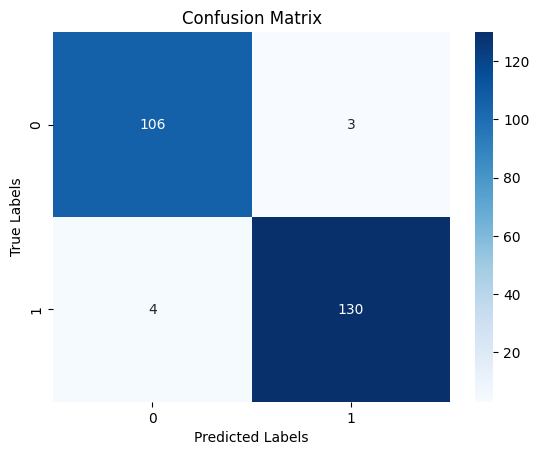

In [ ]:
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

## **Feito tudo isso, de um drop nas colunas criadas durante o Feature Engineering e treine e teste novamente o modelo escolhido na etapa anterior.**
**Dica 1:** Utilizem o mesmo conjunto de treino, teste e validação criado anteriormente, só retirando a coluna nova criada na etapa de Feature Engineering

**Dica 2:** Aqui não precisa treinar 5 versões diferentes do KNN para diferentes valores de K, pegue o modelo de KNN escolhido anteriormente e dê um .fit com os novos dados sem as colunas desejadas.

In [ ]:
x2 = df.drop(columns=['NObeyesdad', 'IMC'])
y2 = df['NObeyesdad']
x2_treino, x2_temp, y2_treino, y2_temp = train_test_split(x2, y2, test_size = 0.25)
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_temp, y2_temp, test_size = 0.5)

In [ ]:
scaler = MinMaxScaler()
x2_train_norm = scaler.fit_transform(x2_treino)
x2_test_norm = scaler.fit_transform(x2_test)
x2_val_norm = scaler.fit_transform(x2_val)

In [ ]:
knn1.fit(x2_train_norm, y2_treino)
y2_pred = knn1.predict(x2_val_norm)
y2_test_pred = knn1.predict(x2_test_norm)

## **Compare as métricas dos dois modelos de KNN. Qual teve melhor desempenho. Porque?**

As métricas de validação para o modelo com a coluna adicionada foram melhores de modo geral do que as do modelo sem a coluna IMC. Provavelmente isso ocorre porque o IMC é mais importante para prever obesidade do que os outros dados presentes no dataset.
Nas métricas de teste, acurácia e o F1 foram muito semelhantes aos do modelo com a coluna do IMC, porém o recall foi um pouco menor sem a coluna do IMC. A precisão ficou com o valor de 1.0, provavelmente indicando algum problema, e não que o modelo realmente ficou perfeito nesse sentido.

In [ ]:
print("Métricas de Validação:\n")
accuracy_score = accuracy_score(y2_val, y2_pred)
print(f'Acurácia no conjunto de validação para k=3: {accuracy_score}')
recall = recall_score(y2_val, y2_pred)
print(f'Recall no conjunto de validação para k=3: {recall}')
precision = precision_score(y2_val, y2_pred)
print(f'Precisão no conjunto de validação para k=3: {precision}')
f1 = f1_score(y2_val, y2_pred)
print(f'F1 no conjunto de validação para k=3: {f1}')

Métricas de Validação:

Acurácia no conjunto de validação para k=3: 0.9506172839506173
Recall no conjunto de validação para k=3: 0.9647887323943662
Precisão no conjunto de validação para k=3: 0.9513888888888888
F1 no conjunto de validação para k=3: 0.9580419580419581


In [ ]:
print("Métricas de Teste:\n")
test2_accuracy = accuracy_score(y2_test, y2_test_pred)
print(f'Acurácia no conjunto de teste para k=3: {test2_accuracy}')
test2_recall = recall_score(y2_test, y2_test_pred)
print(f'Recall no conjunto de teste para k=3: {test2_recall}')
test2_precision = precision_score(y2_test, y2_test_pred)
print(f'Precisão no conjunto de teste para k=3: {test2_precision}')
test2_f1 = f1_score(y2_test, y2_test_pred)
print(f'F1 no conjunto de teste para k=3: {test2_f1}')

Métricas de Teste:

Acurácia no conjunto de teste para k=3: 0.9711934156378601
Recall no conjunto de teste para k=3: 0.9435483870967742
Precisão no conjunto de teste para k=3: 1.0
F1 no conjunto de teste para k=3: 0.970954356846473


Text(0.5, 1.0, 'Confusion Matrix')

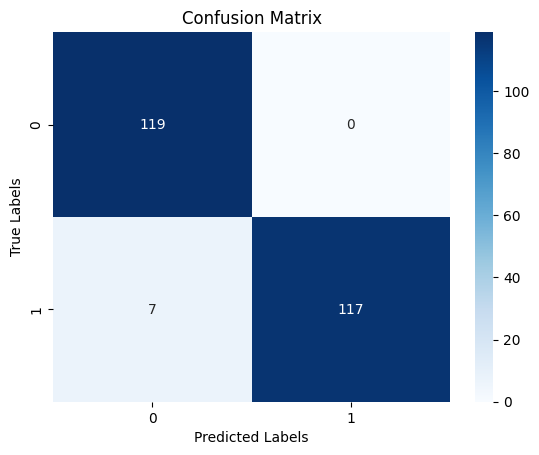

In [ ]:
conf_matrix_test2 = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(conf_matrix_test2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')